# Introduction à l'apprentissage automatique - TP4 exercice 1

### SVM sur données synthétiques

<br> 

Dans la [documentation scikit-learn sur les SVM](http://scikit-learn.org/stable/modules/svm.html), lisez l'introduction.

On utilisera la [classe SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Notez la valeur par défaut de l'hyperparamètre $C$, et les fonctions noyau disponibles nativement (ainsi que leurs paramètres).

<br>

Dans les questions suivantes, nous séparerons les bases de données
entre bases d'apprentissage (80% de la base initiale) et base de test (20%) en utilisant `model_selection.train_test_split`, et nous comparerons les performances des différents classifieurs en calculant le score de classification sur la base de test.

<br>

On commence par charger les bibliothèques utiles et définir une fonction de visualisation que nous utiliserons par la suite:

In [15]:
from sklearn import datasets, model_selection, preprocessing, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


%matplotlib inline

# fonction de visualisation
def plot_classif_result_SVM(X,y,clf,title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])    
    cmap2 = ListedColormap(['#FF8888', '#FFAAAA', '#AAFFAA', '#88FF88'])  
    
    h=0.01 # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Zdf = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z=Zdf>0
    Zdfbin = (np.abs(Zdf)<=1)   # 0 if inside margin,  1 if outside 
    Color=np.zeros(Z.shape)  # colors for each region 
    for i in range(len(Z)):
        if (Z[i]):
            if Zdfbin[i]: Color[i]=2
            else: Color[i]=3
        else:
            if Zdfbin[i]: Color[i]=1 
            else: Color[i]=0
                
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    Color = Color.reshape(xx.shape)    
    plt.figure(figsize=[10,8])
    plt.pcolormesh(xx, yy, Color, cmap=cmap2, shading='auto')
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    
    # Plot the support vectors (stars):
    plt.scatter(X[clf.support_, 0], X[clf.support_, 1], c=y[clf.support_], cmap=cmap_bold,edgecolor='k',s=80, marker='*')    
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title);
    plt.axis("equal")
    plt.show();

## 1. Jeu de données "blobs"

Commençons par un jeu de données constitué de 1000 points du plan dans deux classes linéairement séparables, obtenu avec `make_blobs` (comme dans un des TP précédents). 

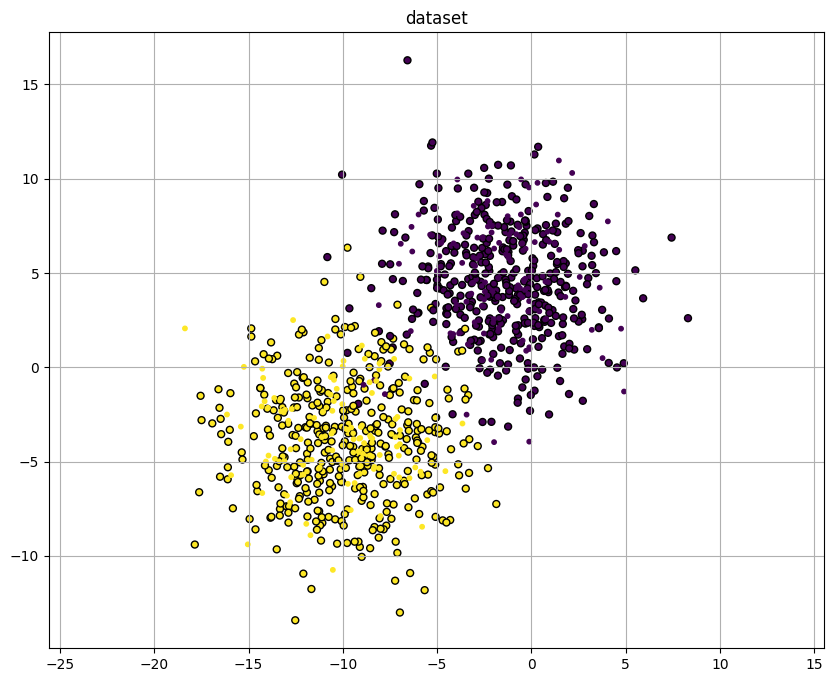

In [4]:
# génération dataset
# on précise random_state pour travailler tous sur le même jeu de données
# avec cluster_std=1.5 dans la ligne suivante, les classes sont linéairement séparables
X_dataset, y_dataset = datasets.make_blobs(n_features=2, centers=2, cluster_std=3, n_samples=1000, random_state=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.2)

# affichage dataset train (gros points) + test (petits points)
plt.figure(figsize=[10,8])
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=10)
plt.title('dataset')
plt.axis('equal')
plt.grid()
plt.show();

Ensuite, nous entraînons une SVM à noyau linéaire, et nous visualisons les vecteurs supports à l'aide de la fonction `plot_classif_result_SVM`.

On affiche également le score de classification sur la base test, ainsi que le nombre de vecteurs supports pour chaque classe.

__Question 1__. Les résultats dans le cas où les classes sont linéairement séparables vous semblent-ils cohérents avec le cours?

Que peut-on dire lorsque les deux classes ne sont plus linéairement séparables? (augmentez la valeur de `cluster_std`)

En particulier, comparez la marge, les vecteurs supports, leur nombre, le score sur la base de test, et le temps de calcul.

(pour obtenir deux classes non linéairement séparables, augmentez la valeur de `cluster_std` dans `make_blobs` dans la cellule précédente, et relancez la cellule suivante)

Apprentissage...

CPU times: user 6.87 ms, sys: 1.31 ms, total: 8.17 ms
Wall time: 6.75 ms

Affichage...



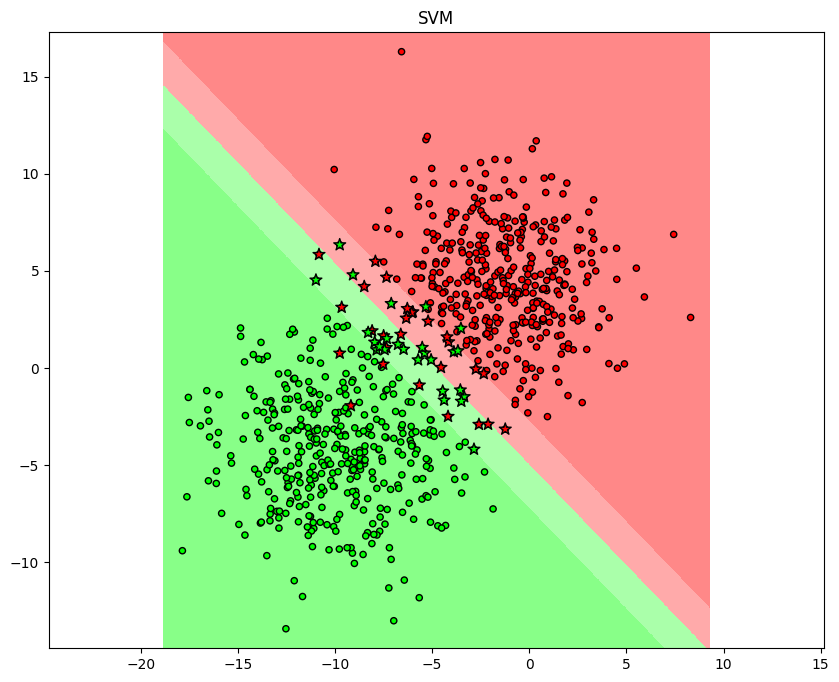

score test SVM 0.970

CPU times: user 1.49 ms, sys: 375 µs, total: 1.87 ms
Wall time: 1.37 ms
nombre de vecteurs supports: 27 pour classe 0 et 26 pour classe 1


In [5]:
SVM=svm.SVC(kernel='linear')
print('Apprentissage...\n')
%time SVM.fit(X_train,y_train)
print('\nAffichage...\n')
plot_classif_result_SVM(X_train,y_train,SVM,"SVM")
%time print("score test SVM %.3f\n" % SVM.score(X_test, y_test) )
print("nombre de vecteurs supports: %d pour classe 0 et %d pour classe 1" % (SVM.n_support_[0],SVM.n_support_[1]))

<font color=red>
    
Réponse:

</font>
<font color=blue>
    
séparation nickel, as expected. Si on augmente std dans blobs, plus de solution... Temps de calcul plus long, score moins bon (normal, quand c'est linéairement séparable on est à 1), marge nulle, vecteurs supports de plus en plus nombreux.
</font>
<font color=green>
    
(le temps d'exécution dépend essentiellement du nombre de vecteurs support)
</font>

## 2. Jeu de données "moons":

Reprenons le jeu de données synthétique `make_moons`:

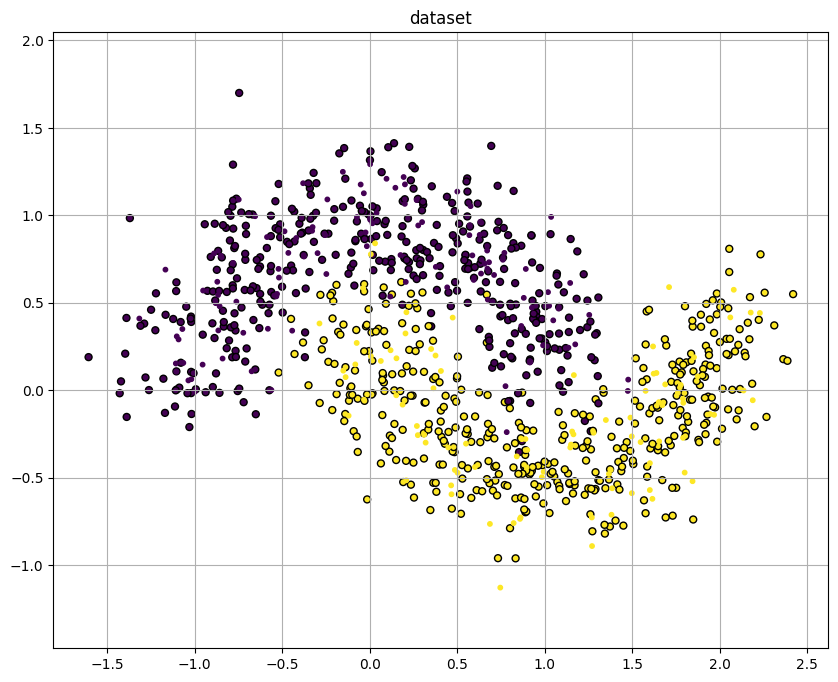

In [6]:
# génération dataset
X_dataset, y_dataset = datasets.make_moons(noise=0.2, n_samples=1000, random_state=1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dataset,y_dataset,test_size=.2)

# affichage dataset train+test
plt.figure(figsize=[10,8])
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=10)
plt.title('dataset')
plt.axis('equal')
plt.grid()
plt.show();

### Noyau linéaire

La celulle suivante permet l'apprentissage par SVM linéaire, avec différentes valeurs de l'hyperparamètre $C$.

__Question 2__. Vérifiez que diminuer la valeur de l'hyperparamètre $C$ augmente le nombre de vecteurs supports (et change la surface de séparation). Est-ce cohérent avec la discussion du cours?


C=100
CPU times: user 37.2 ms, sys: 1.65 ms, total: 38.8 ms
Wall time: 37.3 ms


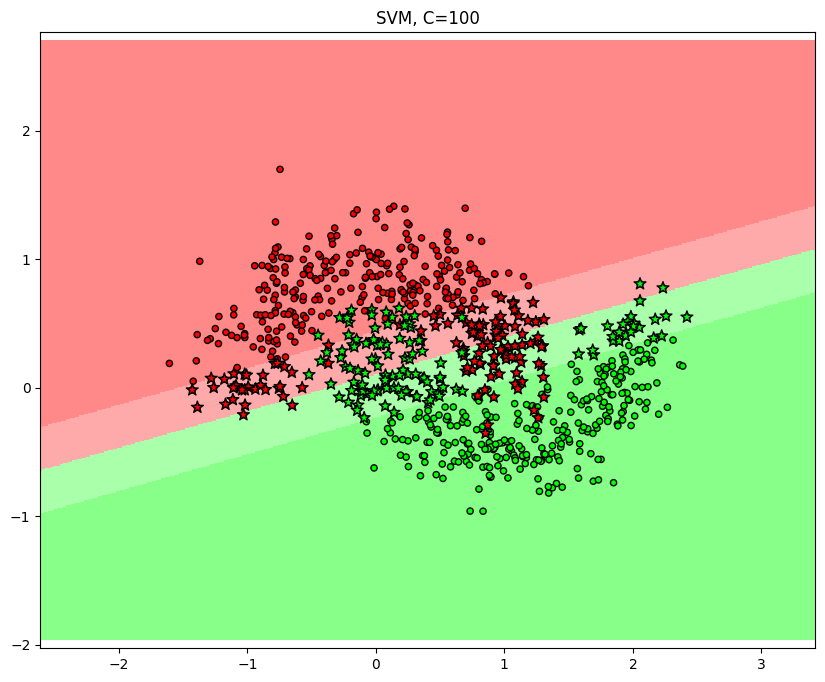

score test SVM 0.865
nombre de vecteurs supports: 127 pour classe 0 et 128 pour classe 1

C=1
CPU times: user 10.8 ms, sys: 588 µs, total: 11.4 ms
Wall time: 11.4 ms


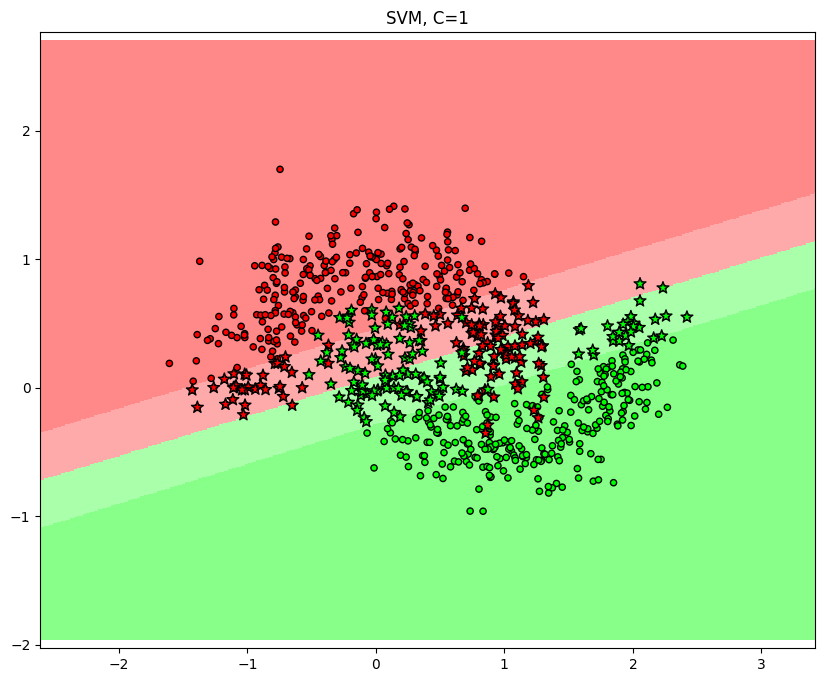

score test SVM 0.865
nombre de vecteurs supports: 131 pour classe 0 et 132 pour classe 1

C=1e-2
CPU times: user 11.3 ms, sys: 546 µs, total: 11.8 ms
Wall time: 11.8 ms


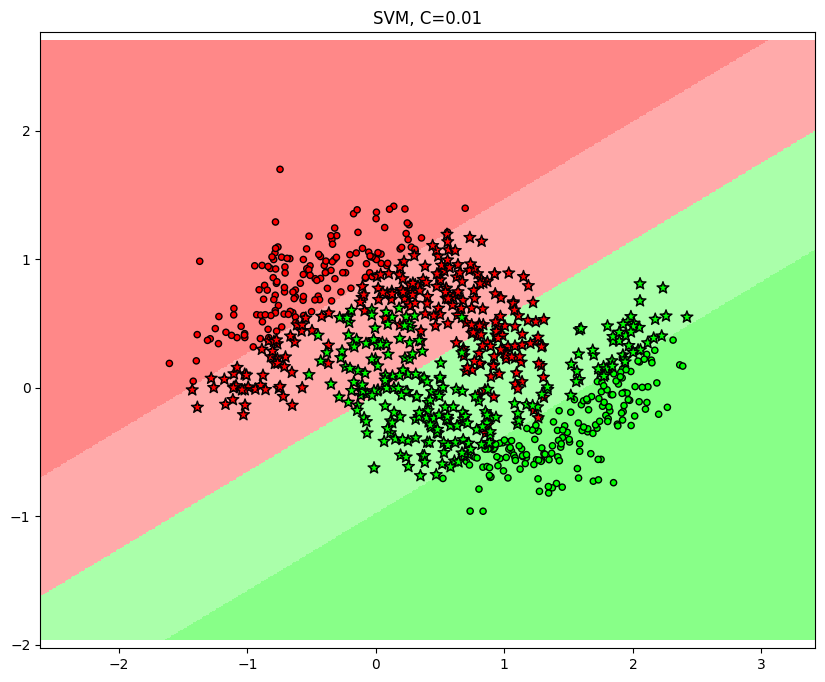

score test SVM 0.830
nombre de vecteurs supports: 239 pour classe 0 et 239 pour classe 1

C=1e-4
CPU times: user 17.2 ms, sys: 768 µs, total: 17.9 ms
Wall time: 17.9 ms


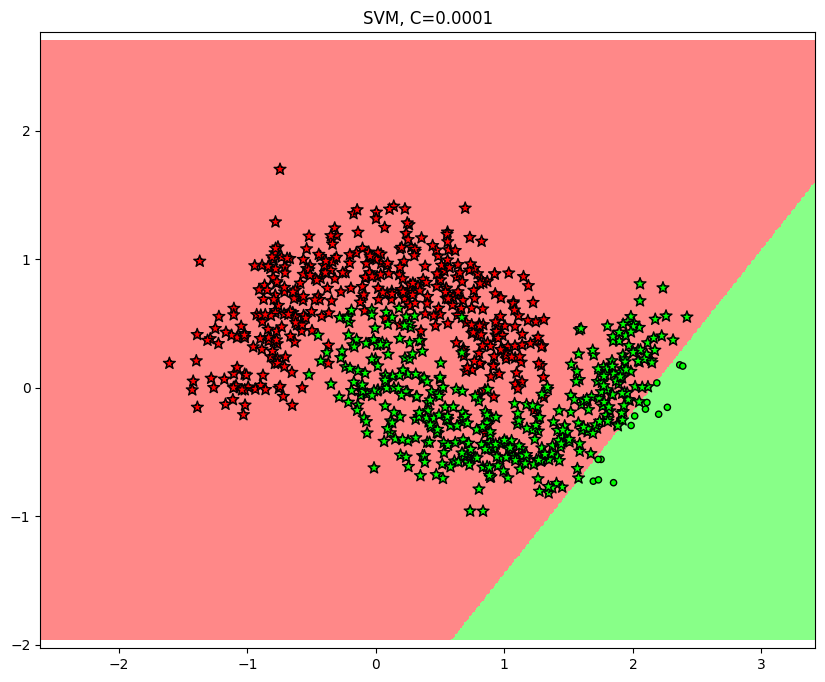

score test SVM 0.465
nombre de vecteurs supports: 393 pour classe 0 et 393 pour classe 1


In [7]:
print("\nC=100")
SVM=svm.SVC(kernel='linear',C=100)
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=100")
print("score test SVM %.3f" % SVM.score(X_test, y_test) )
print("nombre de vecteurs supports: %d pour classe 0 et %d pour classe 1" % (SVM.n_support_[0],SVM.n_support_[1]))

print("\nC=1")
SVM=svm.SVC(kernel='linear')  # par défaut, C=1
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=1")
print("score test SVM %.3f" % SVM.score(X_test, y_test) )
print("nombre de vecteurs supports: %d pour classe 0 et %d pour classe 1" % (SVM.n_support_[0],SVM.n_support_[1]))

print("\nC=1e-2")
SVM=svm.SVC(kernel='linear',C=0.01)
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=0.01")
print("score test SVM %.3f" % SVM.score(X_test, y_test) )
print("nombre de vecteurs supports: %d pour classe 0 et %d pour classe 1" % (SVM.n_support_[0],SVM.n_support_[1]))

print("\nC=1e-4")
SVM=svm.SVC(kernel='linear',C=1e-4)
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=0.0001")
print("score test SVM %.3f" % SVM.score(X_test, y_test) )
print("nombre de vecteurs supports: %d pour classe 0 et %d pour classe 1" % (SVM.n_support_[0],SVM.n_support_[1]))

<font color=red>
   
Réponse:
    
</font>
<font color=blue>
   
Effectivement, plus C augmente, et plus la marge devient petite.Le nombre de vecteurs supports augmente lorsque C diminue.
Pour C très petit, tous les vecteurs sont des vecteurs support (ils sont tous dans la marge) (la représentation est bizarre dans ce dernier cas). 
</font>

### Noyau RBF



__Question 4__. Pour le noyau RBF et la valeur par défaut de $\gamma$, la cellule suivante présente différentes classifications selon les valeurs de $C$. Retrouvez les situations identifiées dans le cas linéaire.

__Rappel__ : d'après __[la documentation](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)__ : _"The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM."_ 

C=1e-2
CPU times: user 25.2 ms, sys: 2.33 ms, total: 27.5 ms
Wall time: 26.2 ms


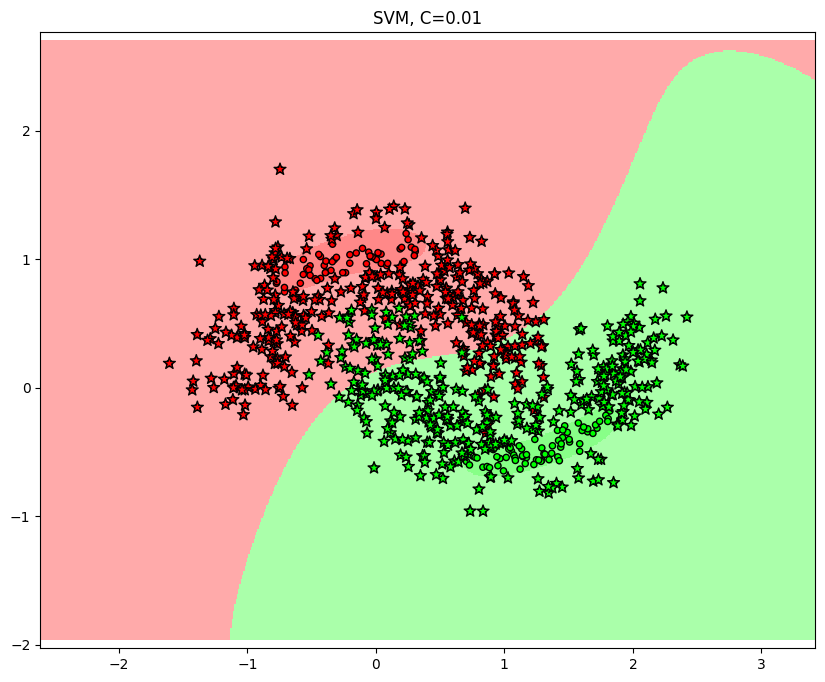

C=0.01, score test SVM 0.870

C=1
CPU times: user 6.72 ms, sys: 160 µs, total: 6.88 ms
Wall time: 6.93 ms


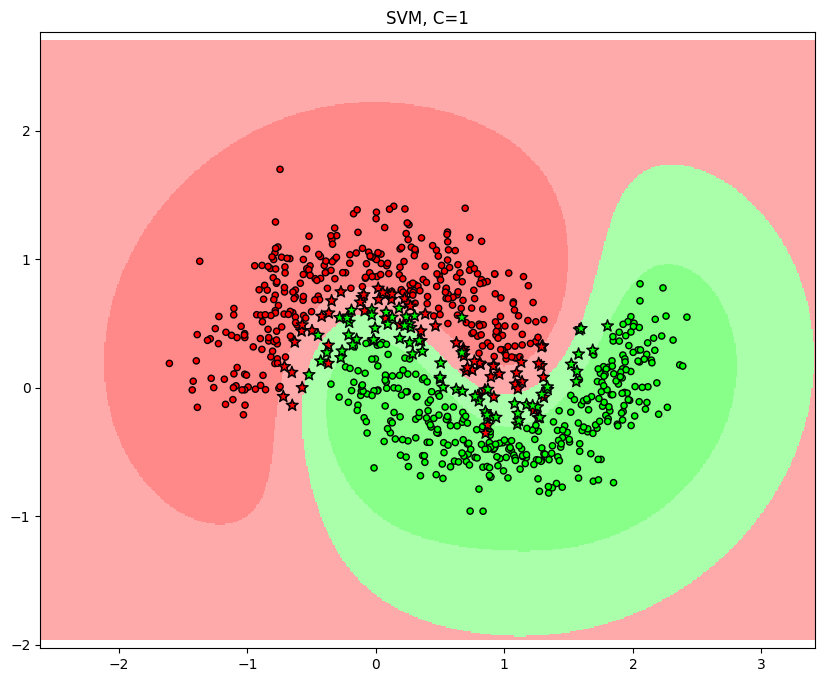

C=1, score test SVM 0.950

C=100
CPU times: user 7.68 ms, sys: 143 µs, total: 7.83 ms
Wall time: 7.82 ms


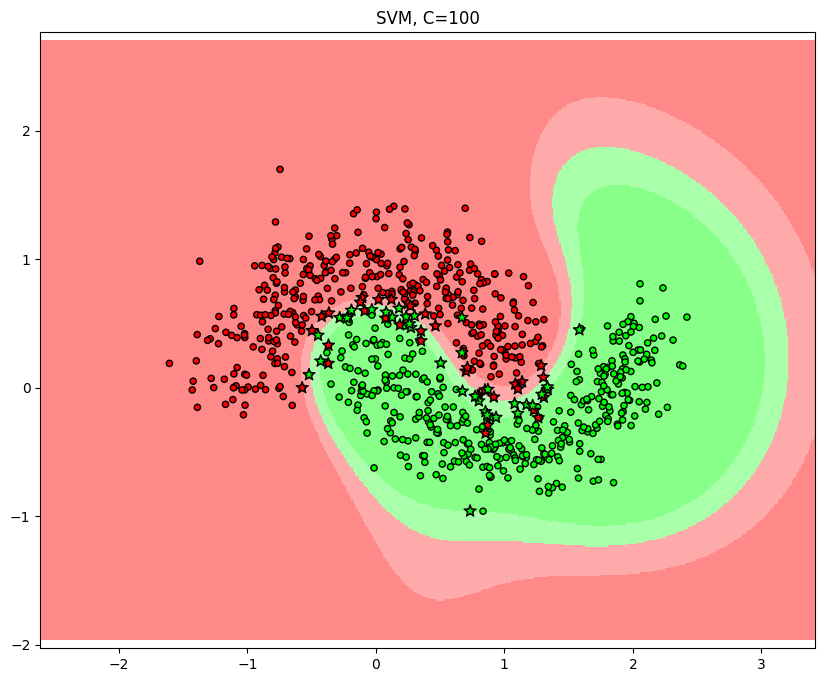

C=100, score test SVM 0.955

C=1e6
CPU times: user 732 ms, sys: 5.1 ms, total: 737 ms
Wall time: 742 ms


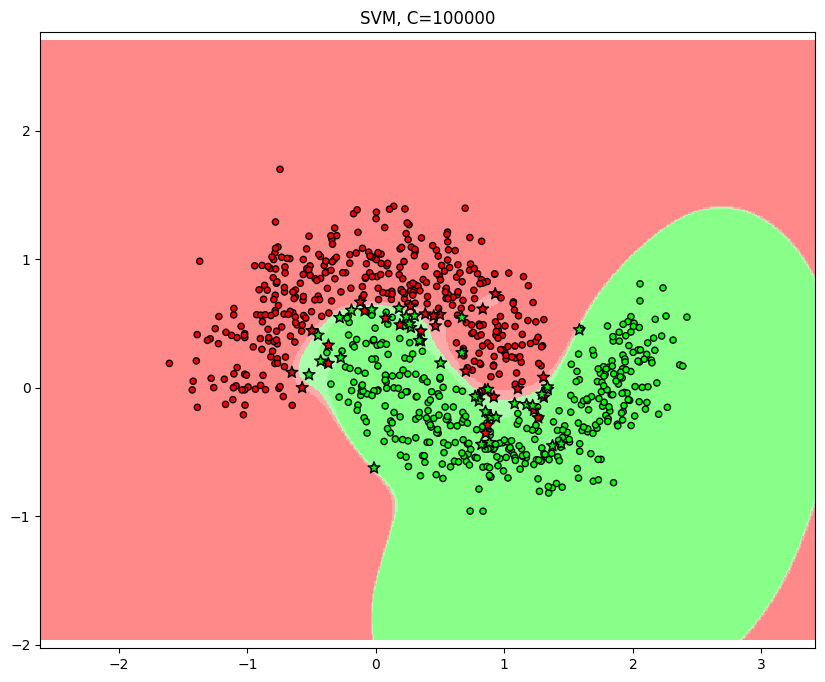

C=10000, score test SVM 0.955


In [8]:
print("C=1e-2")
SVM=svm.SVC(kernel='rbf',C=0.01)
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=0.01")
print("C=0.01, score test SVM %.3f" % SVM.score(X_test, y_test) )

print("\nC=1")
SVM=svm.SVC(kernel='rbf',C=1)  # valeur par défaut
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=1")
print("C=1, score test SVM %.3f" % SVM.score(X_test, y_test) )

print("\nC=100")
SVM=svm.SVC(kernel='rbf',C=100)  
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=100")
print("C=100, score test SVM %.3f" % SVM.score(X_test, y_test) )

print("\nC=1e6")
SVM=svm.SVC(kernel='rbf',C=100000)  
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=100000")
print("C=10000, score test SVM %.3f" % SVM.score(X_test, y_test) )

<font color=red>

Réponse:

</font>
<font color=blue>

C petit $\implies$ grande marge, sous apprentissage. Si C est trop grand, on a un forme de sur-apprentissage.
</font>

La cellule suivante permet de trouver la valeur optimale de l'hyperparamètre $C$ par validation croisée à 5 plis (5-fold cross validation) sur la base d'apprentissage.

C=0.1000  score de validation croisée = 0.9437 +/- 0.0153
C=0.3162  score de validation croisée = 0.9575 +/- 0.0155
C=1.0000  score de validation croisée = 0.9613 +/- 0.0139
C=3.1623  score de validation croisée = 0.9650 +/- 0.0146
C=10.0000  score de validation croisée = 0.9725 +/- 0.0050
C=31.6228  score de validation croisée = 0.9725 +/- 0.0050
C=100.0000  score de validation croisée = 0.9725 +/- 0.0064
C=316.2278  score de validation croisée = 0.9725 +/- 0.0064
C=1000.0000  score de validation croisée = 0.9725 +/- 0.0064
C=3162.2777  score de validation croisée = 0.9713 +/- 0.0075
C=10000.0000  score de validation croisée = 0.9713 +/- 0.0064
C=31622.7766  score de validation croisée = 0.9713 +/- 0.0031
C=100000.0000  score de validation croisée = 0.9725 +/- 0.0031


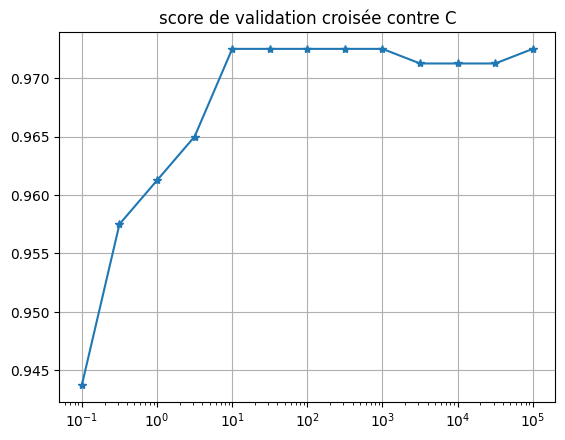

In [22]:
# estimation de C par 5-fold cross validation 
accuracy=[]
arrayC=10**(np.arange(-1,5.5,.5))
for C in arrayC:
    SVM=svm.SVC(kernel='rbf',C=C)      
    scores = model_selection.cross_val_score(SVM, X_train, y_train, cv=5)
    accuracy.append(scores.mean())
    print('C=%.4f  score de validation croisée = %.4f +/- %.4f'%(C,scores.mean(),scores.std()))
plt.figure()
plt.semilogx(arrayC,accuracy,'-*')
plt.title('score de validation croisée contre C')
plt.grid()
plt.show();

# Truc bizarre avec la courbe

 Pour trouver une valeur optimale aux hyperparamètres $\gamma$ et $C$ par validation croisée, on dispose de la fonction [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Cette fonction va calculer le score de validation croisée pour différentes valeurs des paramètres: ici, $C$ et $\gamma$ peuvent prendre des valeurs entre $10^{-3}$ et $10^3$. Par défaut, il s'agit de la validation croisée à 5 plis.

Visualisez les résultats de la cellule suivante:

In [10]:
gamma_range=10**(np.arange(-3.,3.5,.5))
C_range=10**(np.arange(-3.,3.5,.5)) 
parameters = { 'gamma': gamma_range, 'C': C_range }
SVM = svm.SVC(kernel='rbf')
gridsearch=model_selection.GridSearchCV(SVM, parameters,cv=5)
gridsearch.fit(X_train,y_train)
print("Meilleur estimateur trouvé:")
print(gridsearch.best_estimator_)
print("avec un score:")
print(gridsearch.best_score_)
print("Meilleurs paramètres:")
print(gridsearch.best_params_)


Meilleur estimateur trouvé:
SVC(C=316.22776601683796, gamma=0.31622776601683794)
avec un score:
0.9737500000000001
Meilleurs paramètres:
{'C': 316.22776601683796, 'gamma': 0.31622776601683794}


__Question 5__. Quel est le score de classification sur la base de test du meilleur classifieur SVM identifié? Visualisez la surface de séparation entre les classes.

On trouve un score de 0.955 avec le meilleur classifieur SVM identifié.

CPU times: user 8.6 ms, sys: 1.43 ms, total: 10 ms
Wall time: 8.25 ms


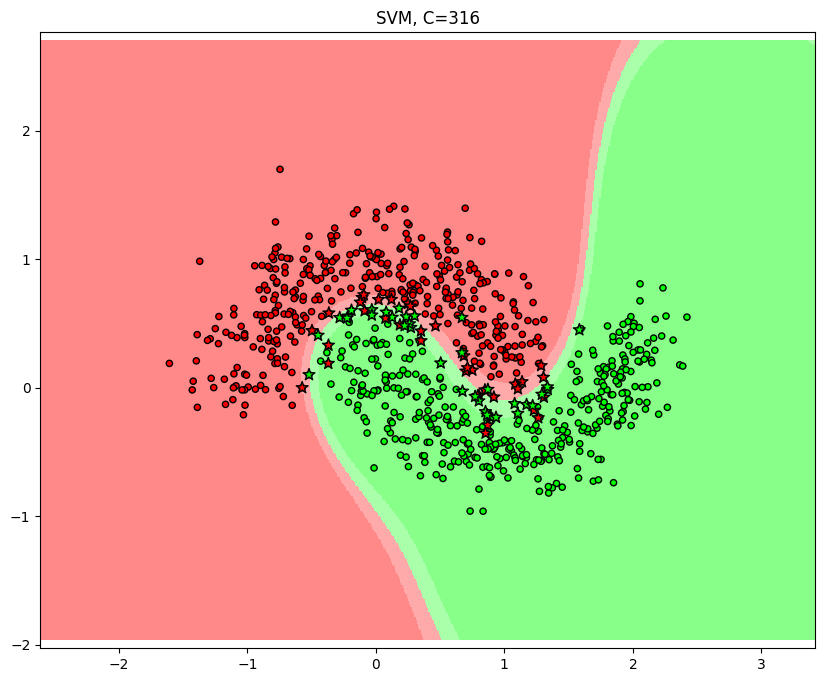

C=316, score test SVM 0.955


In [12]:
# votre code ici
SVM=svm.SVC(kernel='rbf',C=316.22776601683796, gamma=0.31622776601683794)  
%time SVM.fit(X_train,y_train)
plot_classif_result_SVM(X_train,y_train,SVM,"SVM, C=316")
print("C=316, score test SVM %.3f" % SVM.score(X_test, y_test) )

__Question 6__. (révision): Comparez au résultat de la classification de la base de test par les algorithmes de classification aux 1,5, 10 plus proches voisins, au classifieur de la régression logistique, et au classifieur naïf gaussien.


In [23]:
from sklearn import  neighbors, naive_bayes, linear_model, neural_network

# votre code ici

from sklearn import preprocessing
#normaliser les données pour les classifieurs où c'est nécessaire
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Pour 1-ppv:
print(f"Classification 1-ppv:")
knn = neighbors.KNeighborsClassifier(n_neighbors=1)  
scores_knn = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print("Score moyen de validation croisée (5 plis): %0.3f (+/- %0.3f)" % (scores_knn.mean(),2*scores_knn.std()))
knn.fit(X_train_scaled,y_train)  
y_pred_knn = knn.predict(X_test_scaled)  
score_knn = knn.score(X_test_scaled,y_test)
print(f"Score obtenu sur la base de test: {score_knn}\n")

## Pour 5-ppv:
print(f"Classification 5-ppv:")
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)  
scores_knn5 = cross_val_score(knn5,X_train_scaled,y_train,cv=5)
print("Score moyen de validation croisée (5 plis): %0.3f (+/- %0.3f)" % (scores_knn5.mean(),2*scores_knn5.std()))
knn5.fit(X_train_scaled,y_train)  
y_pred_knn5 = knn5.predict(X_test_scaled)  
score_knn5 = knn5.score(X_test_scaled,y_test)
print(f"Score obtenu sur la base de test: {score_knn5}\n")

## Pour 10-ppv:
print(f"Classification 10-ppv:")
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)  
scores_knn10 = cross_val_score(knn10,X_train_scaled,y_train,cv=5)
print("Score moyen de validation croisée (5 plis): %0.3f (+/- %0.3f)" % (scores_knn10.mean(),2*scores_knn10.std()))
knn10.fit(X_train_scaled,y_train)  
y_pred_knn10 = knn10.predict(X_test_scaled)  
score_knn10 = knn10.score(X_test_scaled,y_test)
print(f"Score obtenu sur la base de test: {score_knn10}\n")

#classifieur naïf gaussien
print(f"Classificateur Naïf de Bayes Gaussien:")
GNB = naive_bayes.GaussianNB()
scores = cross_val_score(GNB,X_train,y_train,cv=5)
print("Score moyen de validation croisée (5 plis): %0.3f (+/- %0.3f)" % (scores.mean(),2*scores.std()))
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test) 
score_GNB = GNB.score(X_test,y_test)
print(f"Score obtenu sur la base de test: {round(score_GNB,3)}\n")

print(f"Classificateur de la régression logistique:")
LG = linear_model.LogisticRegression(random_state=0, penalty = None, max_iter = 2000)
scores = cross_val_score(LG,X_train_scaled,y_train,cv=5)
print("Score moyen de validation croisée (5 plis): %0.3f (+/- %0.3f)" % (scores.mean(),2*scores.std()))
LG.fit(X_train_scaled, y_train)
y_pred_LG = LG.predict(X_test_scaled) 
score_LG = LG.score(X_test_scaled,y_test)
print(f"Score obtenu sur la base de test: {score_LG}\n")


Classification 1-ppv:
Score moyen de validation croisée (5 plis): 0.949 (+/- 0.025)
Score obtenu sur la base de test: 0.95

Classification 5-ppv:
Score moyen de validation croisée (5 plis): 0.965 (+/- 0.017)
Score obtenu sur la base de test: 0.96

Classification 10-ppv:
Score moyen de validation croisée (5 plis): 0.966 (+/- 0.017)
Score obtenu sur la base de test: 0.96

Classificateur Naïf de Bayes Gaussien:
Score moyen de validation croisée (5 plis): 0.865 (+/- 0.044)
Score obtenu sur la base de test: 0.865

Classificateur de la régression logistique:
Score moyen de validation croisée (5 plis): 0.867 (+/- 0.038)
Score obtenu sur la base de test: 0.87



<font color=red>

réponse:
    
</font>
<font color=blue>

Tous les ppv sont meilleurs sur la base de test que les SVM. Naïf de Bayes Gaussien et régression logistique sont en revanche moins bons (logique pour la régression logistique, qui est linéaire !).
Le poly rappelle également, pour l eclassifieur naïf de Bayes: 
    Dans le cas biclasse, le classifieur naïf de Bayes est en fait un classifieur linéaire pour un certain nombre de choix de distributions de probabilités p(xi |Ck ). En particulier, c’est le cas dans le cas gaussien si de plus, pour toute composante i , σi ,1 = σi ,2. (page78 version numérique)
</font>

### Complément facultatif: discussion du rôle du paramètre $\gamma$ du noyau RBF

_(à faire en dehors du TD)_

Observez le résultat de la classification avec un noyau
  gaussien (RBF), et l'évolution selon différentes valeurs du
  paramètre `gamma` (on gardera $C=1$, valeur par défaut de `SVC`).

In [ ]:
SVM=svm.SVC(kernel='rbf',gamma=0.01)
SVM.fit(X_train,y_train)
%time plot_classif_result_SVM(X_train,y_train,SVM,"SVM, gamma=0.01")
print("gamma=0.01, score test SVM %.3f" % SVM.score(X_test, y_test) )

SVM=svm.SVC(kernel='rbf',gamma=1)
SVM.fit(X_train,y_train)
%time plot_classif_result_SVM(X_train,y_train,SVM,"SVM, gamma=1")
print("gamma=1, score test SVM %.3f" % SVM.score(X_test, y_test) )

SVM=svm.SVC(kernel='rbf',gamma=100)
SVM.fit(X_train,y_train)
%time plot_classif_result_SVM(X_train,y_train,SVM,"SVM, gamma=100")
print("gamma=100, score test SVM %.3f" % SVM.score(X_test, y_test) )


Avec un noyau gaussien, $k(x,y)=\exp(-\gamma||x-y||^2)$ est différent de 0 seulement lorsque $x$ et $y$ sont proches relativement à $\gamma$ (disons $||x-y||<1/\sqrt{\gamma}$). 

Le coefficient $\sqrt{\gamma}$ peut être vu comme l'inverse de la distance d'influence des vecteurs supports. En effet, le classifieur s'écrit: 
$$f(x) = \sum_i \lambda_i y_i k(x_i,x) + b$$ 

__Lorsque $\gamma$ est grand__, $k(x_i,x)$ a une contribution significative seulement pour $x$ proche d'un des vecteurs supports $x_i$. Ainsi, le signe de $f$ sera différent de celui de $b$ seulement pour $x$ proche d'un vecteur support $x_i$ associé à la classe $y_i$ de signe contraire à celui de $b$. On a intérêt à ce que toutes les observations soient des vecteurs supports de manière à minimiser le nombre de mauvaises classifications, donc la somme des variables d'écart. La surface de séparation est donc la superposition de disques autours des points d'une des classes, ce que l'on observe bien ici.

__Lorsque $\gamma$ est petit__, tous les $k(x_i,x)$ dans l'expression de $f$ ont une contribution. 
Le modèle est alors trop "moyenné" et on a une surface entre classes très régulière (presque une droite ici). 

_Justification au passage_ (en complément): si $\gamma$ est petit, on identifie l'exponentielle et son développement limité à l'ordre 1: $\exp(-\gamma||x-y||^2)=1-\gamma||x-y||^2$. Ensuite:
$$f(x) = \sum_i \lambda_i y_i k(x_i,x) + b = \sum_i \lambda_i y_i (1-\gamma||x_i-x||^2) + b = \sum_i \lambda_i y_i (1-\gamma||x_i||^2-\gamma||x||^2-2\gamma x_i \cdot x) + b  $$ 
Donc:
$$f(x) = \sum_i \lambda_i y_i (1-\gamma ||x_i||^2) + b - \gamma ||x||^2 \sum_i \lambda_i y_i - 2\gamma \left(\sum_i \lambda_i y_i x_i\right) \cdot x$$ 
Comme $\sum_i \lambda_i y_i = 0$ (contrainte primale), $f(x)$ vérifie bien une relation du type $f(x) = B+ w\cdot x$, où  $B=b-\sum_i \lambda_i y_i \gamma ||x_i||^2$ est une constante ne dépendant pas de $x$, et $w=- 2\gamma \left(\sum_i \lambda_i y_i x_i\right)$.
Cela justifie que la frontière de séparation est linéaire dans le graphique obtenu pour $\gamma=0.01$!

<br>

Il y a sous-apprentissage avec $\gamma$ petit, et sur-apprentissage avec $\gamma$ grand.

Lorsqu'on ne spécifie pas $\gamma$ dans `svm.SVC`, une valeur est calculée à partir des observations. Voyez dans la documentation comment la valeur par défaut de $\gamma$ est adaptée en fonction des observations.

</font>



Dans la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html):
    
    
`if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma`
    
Le noyau RBF sans préciser gamma assure donc une normalisation. Attention, on normalise ici par rapport à la variance globale des caractéristiques. La normalisation par `StandardScaler` assure une normalisation caractéristique par caractéristique.
  

__Attention__ , si vous utilisez une version de `sklearn` inférieure à 0.22, passez à `svm.SVC` l'argument `gamma='scale'` pour observer le comportement de la version actuelle (la valeur par défaut était à l'époque `auto`).
    

